In [85]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sensordata
sns.set_style(style='whitegrid')

datasets, features_sets, target_sets, metadata = sensordata.load_and_preprocess_data(validationset=True, savecsv=False, sensorset='FIS')
calibrationset = datasets[0]
calibration_features_matrix = features_sets[0]
calibration_co_cons = target_sets[0].reshape(len(target_sets[0]))

/home/dreuter/Github/kaggle-paths/gas-sensor-array/data/gas-sensor-data.zip
already exists, file not downloaded
csv files already exists in
/home/dreuter/Github/kaggle-paths/gas-sensor-array/data,
no files extracted
Starting to import and preprocess sensor data from 20160930_203718.csv
The shape of features matrix is:
(2020, 306)
20160930_203718.csv successfully imported
Starting to import and preprocess sensor data from 20161001_231809.csv
The shape of features matrix is:
(2016, 306)
20161001_231809.csv successfully imported
Starting to import and preprocess sensor data from 20161003_085624.csv
The shape of features matrix is:
(2020, 306)
20161003_085624.csv successfully imported
Starting to import and preprocess sensor data from 20161004_104124.csv
The shape of features matrix is:
(2020, 306)
20161004_104124.csv successfully imported
Starting to import and preprocess sensor data from 20161005_140846.csv
The shape of features matrix is:
(2016, 306)
20161005_140846.csv successfully imp

In [29]:
print(calibration_co_cons.shape)
print(calibration_features_matrix.shape)
feature_shape = calibration_features_matrix.shape
calibration_co_cons_labels = list(map(str,calibration_co_cons))

(2020,)
(2020, 306)


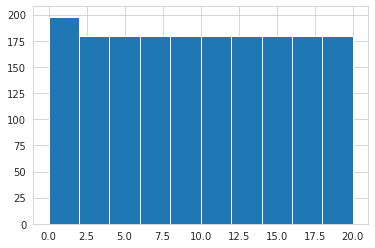

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [70]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)
t = calibration_co_cons_labels
train_folds, train_target_folds, test_folds, test_target_folds = [],[],[],[]
for train_index, test_index in skf.split(np.zeros(len(t)), t):
    train_folds.append(calibration_features_matrix[train_index])
    train_target_folds.append(calibration_co_cons[train_index])
    test_folds.append(calibration_features_matrix[test_index])
    test_target_folds.append(calibration_co_cons[test_index])

plt.hist(train_target_folds[1])
plt.show()
train_folds[0] == train_folds[3]

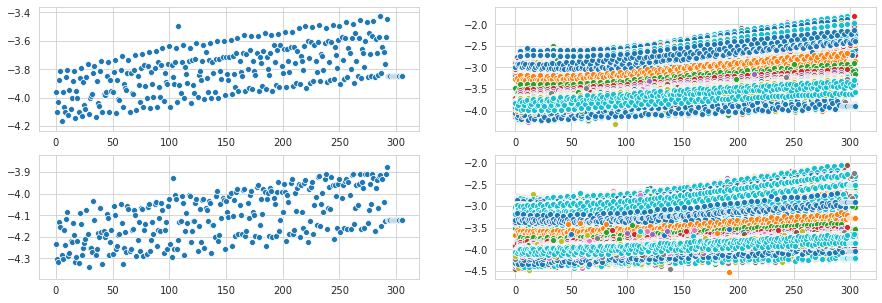

In [14]:
day = 1
fig, axes = plt.subplots(2,2, figsize=(15,5))
signalsample = 1
signalconc = target_sets[day-1][signalsample]
signal = features_sets[day-1][signalsample,:]
nsig = len(signal)
sns.scatterplot(np.arange(nsig),signal, ax=axes[0,0])

signalconcs = target_sets[day-1]
signals = features_sets[day-1]
nsig = len(signals)
for signal in signals[:100]:
    nsig = len(signal)
    sns.scatterplot(np.arange(nsig),signal, ax=axes[0,1])

day = 13
signalsample = 1
signalconc = target_sets[day-1][signalsample]
signal = features_sets[day-1][signalsample,:]
nsig = len(signal)
sns.scatterplot(np.arange(nsig),signal, ax=axes[1,0])

signalconcs = target_sets[day-1]
signals = features_sets[day-1]
nsig = len(signals)
for signal in signals[:100]:
    nsig = len(signal)
    sns.scatterplot(np.arange(nsig),signal, ax=axes[1,1])
plt.show()

### Preparing data

In [35]:
obs = 0
dim = features_sets[0].shape[1]
for set in features_sets:
    obs+=set.shape[0]
features = np.zeros((obs,dim))
target = np.zeros((obs,1))
i = 0
end_obs = 0

for set in range(len(features_sets)):
    start_obs = end_obs
    end_obs += features_sets[set].shape[0]
    features[start_obs:end_obs,:] = features_sets[set]
    target[start_obs:end_obs,:] = target_sets[set]

target = target.reshape(len(target))

features = np.array(pd.DataFrame(features).interpolate(axis=1))
features = np.array(pd.DataFrame(features).interpolate(axis=0))
print(features.shape)
print(target.shape)

data = target
test_ratio = 0.2
shuffled_indices = np.random.permutation(len(data))
test_set_size = int(len(data) * test_ratio)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

X_train = features[train_indices]
X_test = features[test_indices]
y_train = target[train_indices]
y_test = target[test_indices]

(52526, 481)
(52526,)


In [34]:
cv_scores_matrix.shape

(19, 57)

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

signals = calibration_features_matrix
targets = calibration_co_cons

X = signals
y = targets.reshape(len(targets))

test_size = 0.2
#X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=42)
#kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

X_train, X_test , y_train, y_test = train_folds[0], test_folds[0], train_target_folds[0], test_target_folds[0]



estimator_range = np.arange(20, 21)
max_leaf_range = np.arange(30, 33)
cv_scores_matrix = np.zeros((len(estimator_range),len(max_leaf_range)))
rmse = []

i_score, j_score = -1,-1
for i in estimator_range:
    i_score+=1
    for j in max_leaf_range:
        j_score+=1
        j_score = j_score%len(max_leaf_range)
        str_kf = StratifiedKFold(n_splits=10, shuffle=True)
        train_labels = list(map(str,y_train))
        skf = str_kf.split(np.zeros(len(train_labels)), train_labels)
        
        forest_reg = RandomForestRegressor(n_estimators=i, max_leaf_nodes=j, n_jobs=-1, random_state=42)
        score = model_selection.cross_val_score(forest_reg, X_train, y_train, cv=skf, scoring='neg_mean_squared_error').mean()
        rmse.append(np.sqrt(-score))
        
        cv_scores_matrix[i_score, j_score] = np.sqrt(-score)
        np.savetxt('cv_score.csv',cv_scores_matrix, delimiter=',', fmt='%1.4f')
        
        print("Number of estimators: " + str(i) + ", number of max_leafs: " + str(j) + ", average CV score: " + str(np.sqrt(-score)))

Number of estimators: 20, number of max_leafs: 30, average CV score: 2.46703767383121
Number of estimators: 20, number of max_leafs: 31, average CV score: 2.483936361808186
Number of estimators: 20, number of max_leafs: 32, average CV score: 2.5062723036038457


In [115]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

for i in range(2):
    str_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    train_labels = list(map(str,y_train))
    skf = str_kf.split(np.zeros(len(train_labels)), train_labels)
    
    forest_reg = RandomForestRegressor(n_estimators=i+20, max_leaf_nodes=i+55, n_jobs=-1, random_state=42)
    score = model_selection.cross_val_score(forest_reg, X_train, y_train, cv=skf, scoring='neg_mean_squared_error').mean()
    rmse_score = np.sqrt(-score)

    print("Number of estimators: " + str(i+20) + ", number of max_leafs: " + str(i+55) + ", average CV score: " + str(rmse_score))

Number of estimators: 40, number of max_leafs: 80, average CV score: 2.334840168183379
Number of estimators: 41, number of max_leafs: 81, average CV score: 2.3349892760238276


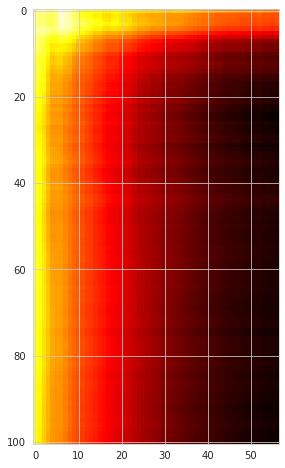

In [72]:
cv_score_df = pd.read_csv("cv_estimator_maxleafs.csv", header=None)

plt.figure(figsize=(15,8))
plt.imshow(cv_score_df, cmap='hot', interpolation='nearest')
plt.show()

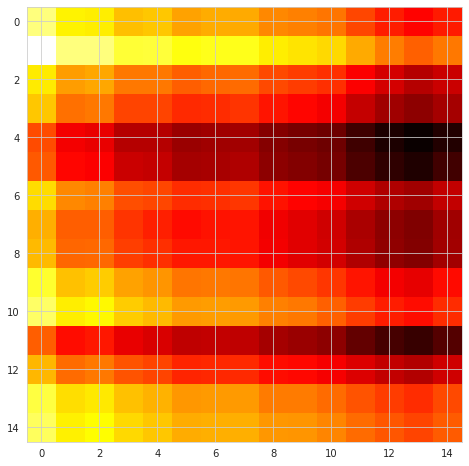

In [71]:
cv_score_df = pd.read_csv("cv_score.csv", header=None)

plt.figure(figsize=(15,8))
plt.imshow(cv_score_df, cmap='hot', interpolation='nearest')
plt.show()

In [86]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1616, 306) (1616,)
(404, 306) (404,)


In [86]:
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

forest_reg = RandomForestRegressor(n_estimators=25, max_leaf_nodes=60, n_jobs=-1)
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5,
                                n_jobs=-1)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.82795062 2.58705726 3.10464513 2.10511699 2.93299517]
Mean: 2.711553033690012
Standard deviation: 0.3465170389251338


Root mean squared error: 2.1559337840222357
Slope: 0.8734131037965573
Intercept: 1.4587659591147175

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          1.230e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):                   4.68e-304
Time:                        23:24:03   Log-Likelihood:                         -883.22
No. Observations:                 404   AIC:                                      1768.
Df Residuals:                     403   BIC:                                      1772.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 co

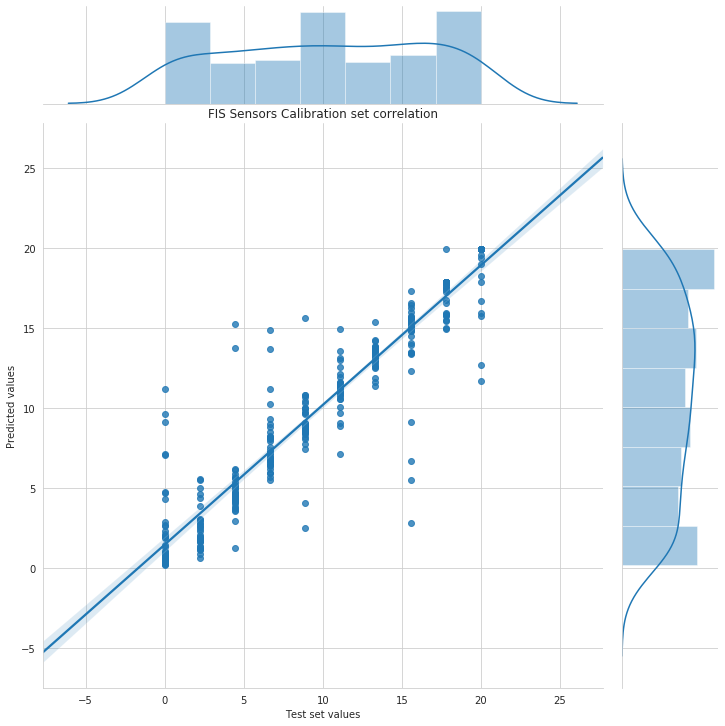

In [93]:
forest_reg.fit(X_train, y_train)

Y_pred = forest_reg.predict(X_test)

forest_mse = mean_squared_error(y_test, Y_pred)
forest_rmse = np.sqrt(forest_mse)
p, residuals, rank, singular_values, rcond = np.polyfit(y_test,Y_pred, 1, full=True)
results = sm.OLS(y_test,Y_pred).fit()
print('Root mean squared error: ' + str(forest_rmse))
print("Slope: " + str(p[0]) + "\nIntercept: " + str(p[1]))
print("")
print(results.summary())

# Correlation plot
sns.jointplot(y_test, Y_pred, kind='reg', height=10)
plt.title("FIS Sensors Calibration set correlation")
plt.ylabel("Predicted values")
plt.xlabel("Test set values")
plt.show()

Root mean squared error: 2.576338505201108
Slope: 0.7862623466029716
Intercept: 1.421007831881192

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          4.553e+04
Date:                Wed, 25 Sep 2019   Prob (F-statistic):                        0.00
Time:                        23:28:04   Log-Likelihood:                         -4464.1
No. Observations:                2020   AIC:                                      8930.
Df Residuals:                    2019   BIC:                                      8936.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef

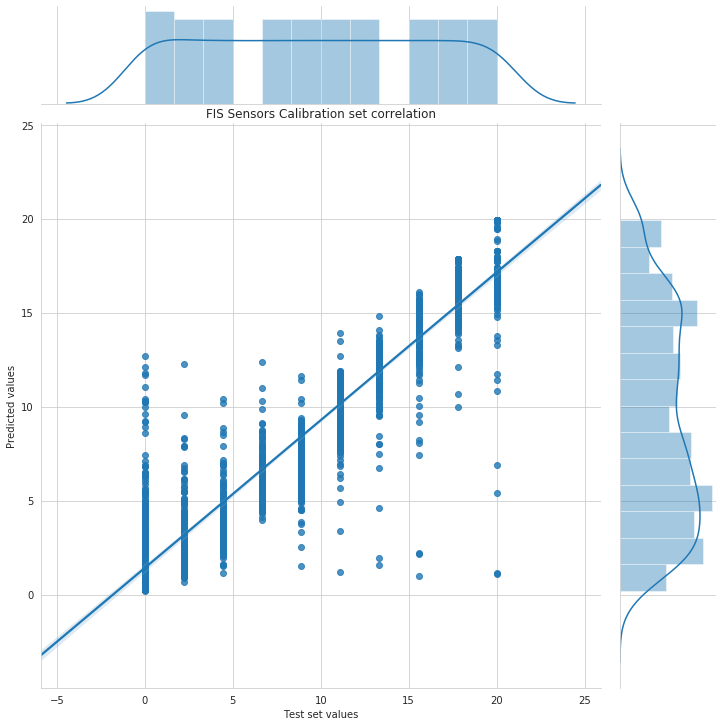

In [97]:
day = 13

val_features_matrix = features_sets[day-1]
val_co_cons = target_sets[day-1]

X = val_features_matrix
y = val_co_cons
n = len(X)
Y_pred = np.array(forest_reg.predict(X)).reshape(n)
y_eval = np.array(y).reshape(n)

rmse = np.sqrt(mean_squared_error(y_eval, Y_pred))
p, residuals, rank, singular_values, rcond = np.polyfit(y_eval,Y_pred, 1, full=True)
results = sm.OLS(Y_pred,y_eval).fit()
print('Root mean squared error: ' + str(rmse))
print("Slope: " + str(p[0]) + "\nIntercept: " + str(p[1]))
print("")
print(results.summary())

# Correlation plot
sns.jointplot(y_eval,Y_pred, kind='reg', height=10)
plt.title("FIS Sensors Calibration set correlation")
plt.ylabel("Predicted values")
plt.xlabel("Test set values")
plt.savefig('images/val_corr.png',dpi=100)
plt.show()

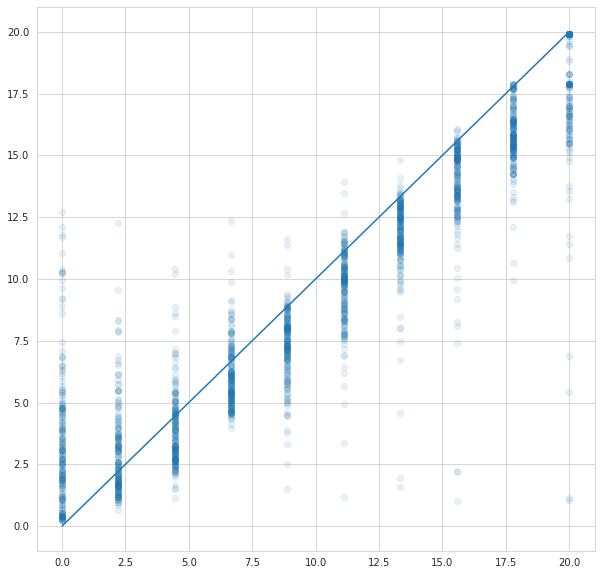

In [99]:
x = y_eval
y = Y_pred.reshape(len(Y_pred))
plt.figure(figsize=(10,10))
plt.scatter(x,y,alpha=0.1)
plt.plot(np.arange(0,21),np.arange(0,21))
plt.show()

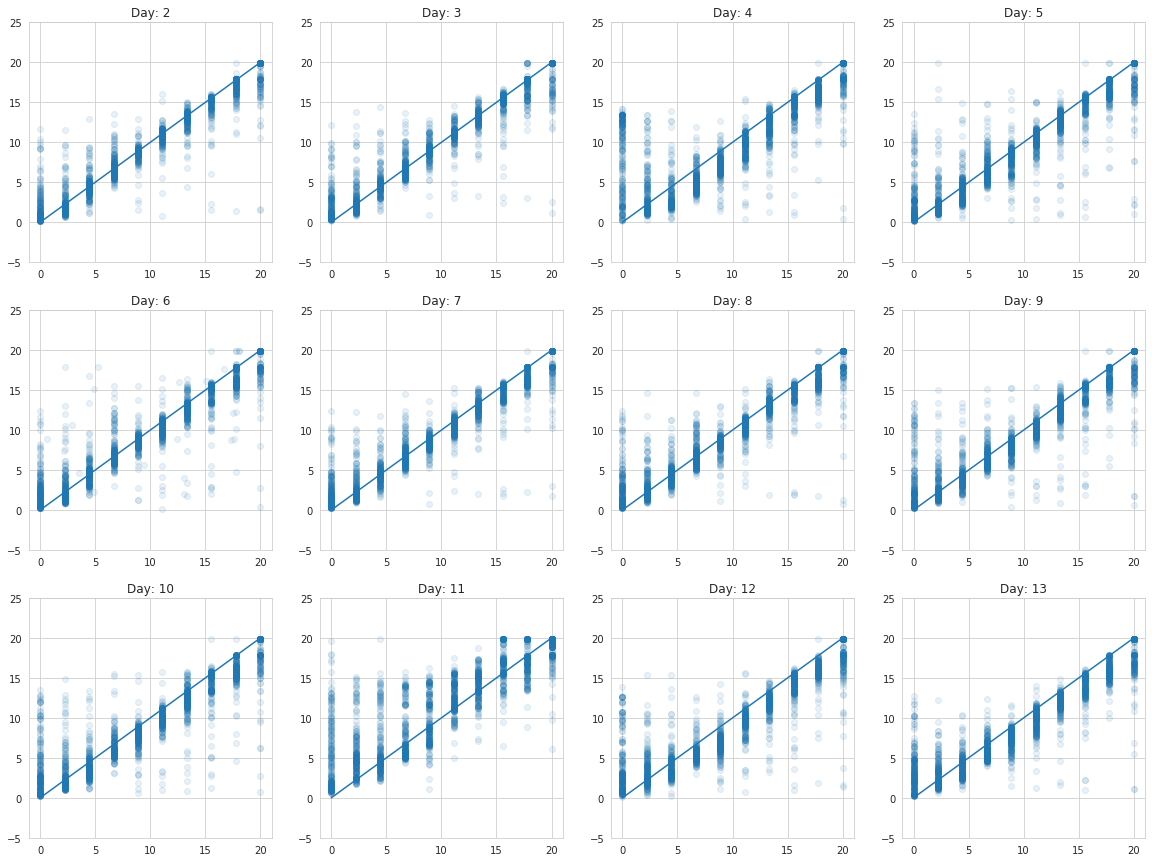

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

fig, axes = plt.subplots(3,4, figsize=(20,15))
row = 0
slopes, intercepts, MSE, r2 = [],[],[],[]
for i in range(1,13):
    val_features_matrix = features_sets[i]
    val_co_cons = target_sets[i]

    X = val_features_matrix
    y = val_co_cons
    n = len(X)
    Y_pred = np.array(forest_reg.predict(X)).reshape(n)
    y_eval = np.array(y).reshape(n)

    x = y_eval.reshape(len(y_eval))
    y = Y_pred.reshape(len(Y_pred))
    p = np.polyfit(x, y, 1)
    slopes.append(p[0])
    intercepts.append(p[1])
    MSE.append(mean_squared_error(x,y))
    r2.append(r2_score(x,y))
    
    col = (i-1)%4
    axes[row,col].scatter(x,y,alpha=0.1)
    axes[row,col].plot(np.arange(0,21),np.arange(0,21))
    axes[row,col].set_title("Day: " + str(i+1))
    axes[row,col].set_ylim((-5,25))
    if i%4 == 0 and i != 0:
        row+=1

plt.show()

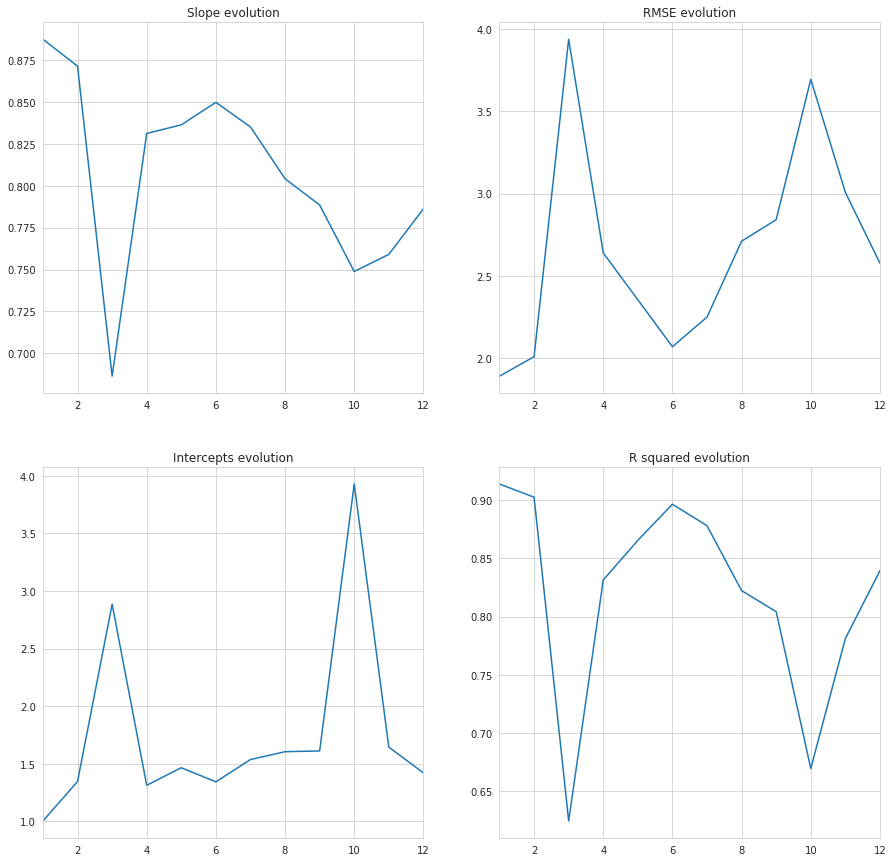

In [101]:
fig, axes = plt.subplots(2,2, figsize = (15,15))
plotrange = np.arange(1,13)

axes[0,0].plot(plotrange,slopes)
axes[0,0].set_title("Slope evolution")
axes[0,0].set_xlim((1,12))

axes[1,0].plot(plotrange,intercepts)
axes[1,0].set_title("Intercepts evolution")
axes[1,0].set_xlim((1,12))

axes[0,1].plot(plotrange,np.sqrt(MSE))
axes[0,1].set_title("RMSE evolution")
axes[0,1].set_xlim((1,12))

axes[1,1].plot(plotrange,r2)
axes[1,1].set_title("R squared evolution")
axes[1,1].set_xlim((1,12))

plt.show()